# Tarea 15 b

In [2]:
using SymPy;
using Plots
plot = Plots;
using PyPlot;
plt = PyPlot;

  likely near /Users/ivanhernandezgaribay/.julia/v0.6/Plots/src/series.jl:91
  likely near /Users/ivanhernandezgaribay/.julia/v0.6/Plots/src/series.jl:91


In [3]:
__precompile__()

module herramientas

using SymPy;

##NEWTON##
######################################################################################################################
export newton2
function newton2(f, df, x0, precision)
    x = x0
    prec = precision              #Defino la precisión deseada
    while abs(f(x)) > prec     #Ciclo while mientras la sustitución de la raíz en el polinomio
                                #sea mayor a la precisión
        x = x - f(x)/df(x)         #Iteracion de Newton
    end
    return x
end;

######################################################################################################################
export newton_arr
function newton_arr(f, df, x0, precision)
    x=newton2.(f,df,x0, precision)
    eps = 1e-17            #Defino la precisión deseada
    T=[]                    #Defino el arreglo en donde pondré las raíces revisadas
    dim1=length(x)
    for i in 1:dim1       #for para cada elemento del arreglo original x
        cont = 0
        for j in 1:(i-1)       #revisar todas las entradas anteriores a cada i
            if abs(x[i]-x[j]) > eps          #condicion que nos interesa (que difieran por
                                                #cierta cantidad prec)
                cont = cont + 1                #contador para compararlo después
            end    
        end    
        if cont == i-1              #Si al final del ciclo for, cont == i-1, significa que
                                    #x[i] cumple la condición para todos los términos
                                    #anteriores, y entonces sí lo tomamos en cuenta
            push!(T,x[i])         #agregar término al arreglo final
        end    
    end    
    T
end;

######################################################################################################################
export newton
function newton(f,x0, precision)
    y = symbols("y")
    g = f(y)
    dg = diff(f(y),y)
    lg = lambdify(g,[y])
    ldg = lambdify(dg,[y])
    newton_arr(lg,ldg,x0, precision)
end

##MÉTODOS DE INTEGRACIÓN##
######################################################################################################################
export rectangulo
function rectangulo(f, a, b, n)
    S=0      #S será el valor que vaya sumando en las iteraciones
    A = linspace.(a,b,n)      # Defino la partición del intervalo X
    for j in 1:n-1            #Comienza la iteración de la suma con el método del rectángulo
        S = S + (A[j+1]-A[j])*f((A[j+1]+A[j])/2)
    end   
    S    
end  

######################################################################################################################
export trapecio
function trapecio(f, a, b, n)
    S=0
    A = linspace.(a,b,n)
    for j in 1:n-1
        S = S + (A[j+1]-A[j])*(f(A[j+1])+f(A[j]))/2  #Comienza la iteración de la suma con el método del trapecio
    end   
    S    
end

######################################################################################################################
export simpson
function simpson(f, a, b, n)
    S=0
    A = linspace.(a,b,n)
    for j in 1:n-1
        p = (A[j+1] + A[j])/2
        S = S + (A[j+1]-A[j])/6 * (f(A[j]) + 4f(p) + f(A[j+1]))      #Comienza la iteración de la suma con el método de simpson
    end   
    S    
end

##INTERPOLACIÓN DE LAGRANGE##
######################################################################################################################
export base
function base(Arx)       #Defino la función base que nos dará las bases polinomiales
    x = symbols("x")     #definir x como símbolo nos dará posibilidad de tomarla como función
    d = length(Arx)      
    K = []
    P = 1                #Este es el contador de la multiplicación
    for i in 1:d         #ciclo para cada entrada de Arx
        P = 1            #Regreso P=1 para volver a contar de nuevo
        for j in 1:d     #Nuevo ciclo para la doble multiplicación
            if j != i    #Si se cumple la condición para no dividir entre cero
                P = P*(x-Arx[j])/(Arx[i]-Arx[j])      #Definición de base polinomial
            end
        end
        push!(K,P)       #Agregar a K el P final de cada i
    end
    K
end

######################################################################################################################
export interpolacion
function interpolacion(Arx, Ary, x0)
    d = length(Arx)
    L = 0
    K = base(Arx)
    P = 1
    for i in 1:d              #la suma que es combinación lineal
        L = L + Ary[i]*K[i]   #Definición para obtener L
    end
    #println(convert(AbstractFloat,L(x0)))     #Para transformar L(x0) a flotante
    expand(L(x0))             #Para desarrollar el polinomio
end

##Derivadas Numéricas##
######################################################################################################################
export derivada_de
function derivada_de(f,x0,h)
    (f(x0+h)-f(x0))/h
end

######################################################################################################################
export derivada_iz
function derivada_iz(f,x0,h)
    (f(x0-h)+f(x0))/h
end

######################################################################################################################
export derivada_si
function derivada_sime(f,x0,h)
    (f(x0+h)-f(x0-h))/2h
end

##Derivada Numérica Orden n##
######################################################################################################################
export coef_taylor_log
function coef_taylor_log(i)
    x=Sym("x");
    h=Sym("h");
    N(subs(diff(log((0.5x+((0.5x)^2. + 1.)^0.5)),x,i)/factorial(Float64(i)),x=>0))
end;

######################################################################################################################
export coef_taylor_log_racional
function coef_taylor_log_racional(i)
    x=Sym("x");
    h=Sym("h");
    subs(diff(log((0.5x+((0.5x)^2. + 1.)^0.5)),x,i)/factorial(Float64(i)),x=>0)
end;

######################################################################################################################
export diferencia_finita_sim
function diferencia_finita_sim(f)
    return (x,h)->f(x+h,h)-f(x-h,h)
end;

######################################################################################################################
export derivada_sim_n
function derivada_sim_n(f,x,h,order)
    g(x,h)=f(x)
    deriv=0
    for i in range(1,order)
        g=diferencia_finita_sim(g)
        deriv=deriv+coef_taylor_log(i)*g(x,h)
    end
    deriv/h
end;

######################################################################################################################
function derivada_sim_racional_n(f,x,h,order)
    g(x,h)=f(x)
    deriv=0
    for i in range(1,order)
        g=diferencia_finita_sim(g)
        deriv=deriv+coef_taylor_log_racional(i)*g(x,h)
    end
    deriv/h
end;

##Métodos de Solución de Ecuaciones Diferenciales##
######################################################################################################################
export metodo_euler
function metodo_euler(f,x0,listh)
    #listh = linspace(t0,tf,(tf-t0)/h)
    x = x0
    S = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        x = x + h*f(x,i)
        push!(S,x)
    end
    listh, S
end

######################################################################################################################
export metodo_euler_medio
function metodo_euler_medio(f,x0,listh)
    #listh = linspace(t0,tf,(tf-t0)/h)
    x = x0
    S = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        x = x + h*f(x +(h/2.)*f(x,i),i+h/2.)
        push!(S,x)
    end
    listh, S
end

######################################################################################################################
export euler_implicito_pf
function euler_implicito_pf(f,x0,listh)
    x = x0
    S = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        z = x
        for j in 1:2
            z = x + h*f(z,i+h)
        end
        x = z
        push!(S,x)
    end
    listh, S
end

######################################################################################################################
export metodo_euler_2
function metodo_euler_2(f,CI,listh) #CI es arreglo con condiciones iniciales
    #listh = linspace(t0,tf,(tf-t0)/h)
    x=CI[1]
    u=CI[2]
    Sx = []
    Su = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        x = x + h*u
        u = u + h*f(i,x,u)
        push!(Sx,x)
        push!(Su,u)
    end
    listh, Sx, Su
end;

######################################################################################################################
export metodo_RK4
function metodo_RK4(f,x0,listh)
    #listh = linspace(t0,tf,(tf-t0)/h)
    x = x0
    S = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        k1 = f(x,i)
        k2 = f(x+ (h/2.)*k1, i+h/2.)
        k3 = f(x+ (h/2.)*k2, i+h/2.)
        k4 = f(x + h*k3,i+h)
        x = x + (h/6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        push!(S,x)
    end
    listh, S
end

######################################################################################################################
export metodo_RK4_2
function metodo_RK4_2(f,g,CI,listh)
    #listh = linspace(t0,tf,(tf-t0)/h)
    x=CI[1]
    u=CI[2]
    Sx = []
    Su = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        m1 = g(x,u,i)
        k1 = f(x,u,i)
        m2 = g(x+ (h/2.)*m1,u+ (h/2.)*k1, i+h/2.)
        k2 = f(x+ (h/2.)*m1,u+ (h/2.)*k1, i+h/2.)
        m3 = g(x+ (h/2.)*m2,u+ (h/2.)*k2, i+h/2.)
        k3 = f(x+ (h/2.)*m2,u+ (h/2.)*k2, i+h/2.)
        m4 = g(x+ h*m3,u+ h*k3, i+h)
        k4 = f(x+ h*m3,u+ h*k3, i+h)
        
        x = x + (h/6.)*(m1 + 2.*m2 + 2.*m3 + m4)
        u = u + (h/6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        push!(Sx,x)
        push!(Su,u)
    end
    listh, Sx, Su
end

end

herramientas

In [221]:
H=[-3.,2.,3.,4.,3.,10.]
herramientas.newton2.(x->x^3, x->3x^2,H,1e-10)

6-element Array{Float64,1}:
 -0.000400972
  0.000400972
  0.000400972
  0.000356419
  0.000400972
  0.000396021

In [222]:
herramientas.newton_arr(x->x^3, x->3x^2,H,1e-10)

4-element Array{Any,1}:
 -0.000400972
  0.000400972
  0.000356419
  0.000396021

In [223]:
H=[-3.,2.,3.,4.,3.,10.]
herramientas.newton(x->x^3,H,1e-10)

4-element Array{Any,1}:
 -0.000400972
  0.000400972
  0.000356419
  0.000396021

In [224]:
herramientas.rectangulo(x->x^2,0,1,100)

0.33332483079957825

In [225]:
herramientas.trapecio(x->x^2,0,1,100)

0.33335033840084344

In [226]:
herramientas.simpson(x->x^2,0,1,100)

0.33333333333333337

In [227]:
Arx=[1,2,3,4,5,6,7,8,9]
Ary=[1,4,9,16,25,36,49,64,81]    #Este arreglo es el cuadrado de Arx
println(herramientas.interpolacion(Arx,Ary,2))  #La interpolación evaluada en 2
herramientas.interpolacion(Arx,Ary,symbols("x"))            #El resultado simbólico de la interpolación

4


 2
x 

-173*x^6/2520 + 113*x^5/84 - 4957*x^4/504 + 2731*x^3/84 - 54571*x^2/1260 + 83*x/14 + 10



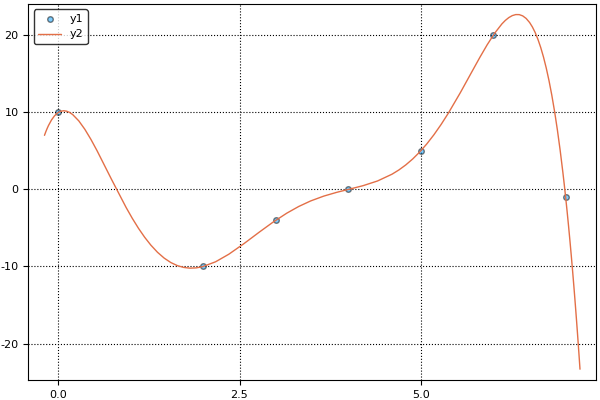

In [228]:
Arx = [0,2,3,4,5,6,7]
Ary = [10,-10,-4,0,5,20,-1]
println(herramientas.interpolacion(Arx,Ary,x))
plot.scatter(Arx,Ary,alpha=0.5)
plot.plot!(herramientas.interpolacion(Arx,Ary,symbols("x")))

In [229]:
herramientas.derivada_de(x->x^2,2,0.0001)

4.0001000000078335

In [230]:
herramientas.derivada_iz(x->x^2,2,0.0001)

79996.00009999999

In [231]:
herramientas.derivada_sime(x->x^2,2,0.0001)

4.000000000004

In [233]:
herramientas.derivada_sim_n(sin,10.0,0.01,6)

-0.8390715290763999

In [234]:
herramientas.derivada_sim_racional_n(sin,10.0,0.01,6)

-0.839071529076400

In [235]:
cos(10.0)

-0.8390715290764524

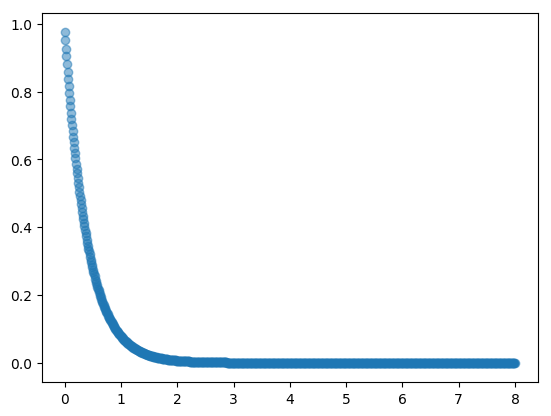

PyObject <matplotlib.collections.PathCollection object at 0x1276b4b50>

In [4]:
A1,A2=herramientas.metodo_euler((x,t)->-2.5x,1,linspace(0,8,800))
plt.scatter(A1,A2,alpha=0.5)

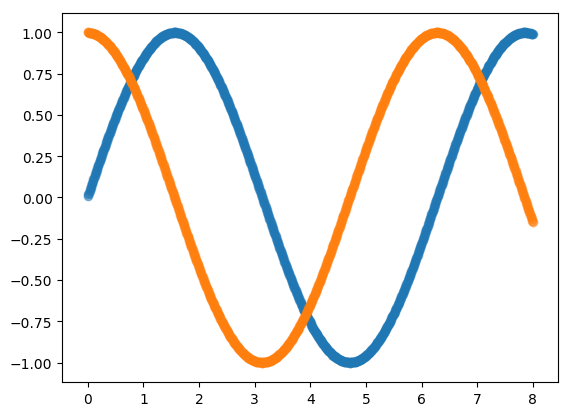

PyObject <matplotlib.collections.PathCollection object at 0x12ab2c610>

In [6]:
A1,A2,A3=herramientas.metodo_euler_2((i,x,u)-> -x,[0,1],linspace(0,8,800)) #La solución es la función sen(x)
plt.scatter(A1,A2,alpha=0.5)
plt.scatter(A1,A3,alpha=0.5)

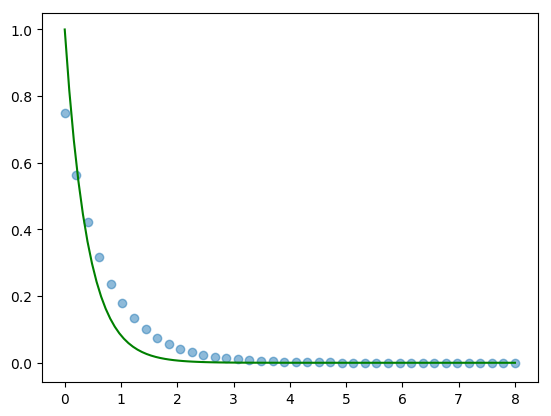

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1276ccd90>

In [7]:
A1,A2=herramientas.euler_implicito_pf((x,t)->-2.5x,1,linspace(0,8,40))
#println(A2)
plt.scatter(A1,A2, alpha=0.5)
e1 = []
for i in linspace(0,8,100)
    push!(e1,e^(-2.5*i))
end
plt.plot(linspace(0,8,100),e1, color="green")

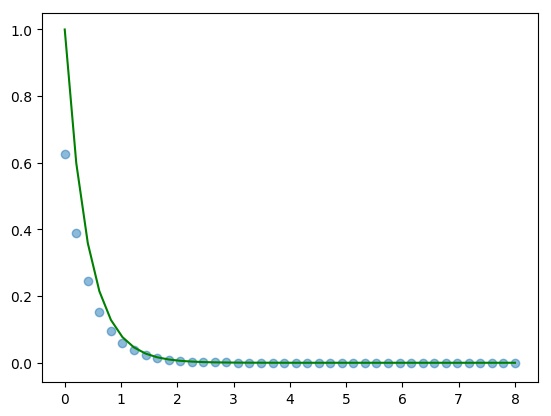

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12ae84f10>

In [8]:
A3,A4=herramientas.metodo_euler_medio((x,t)->-2.5x,1,linspace(0,8,40))
plt.scatter(A3,A4, alpha=0.5)
eA3 = []
for i in A3
    push!(eA3,e^(-2.5*i))
end
plt.plot(A3,eA3, color="green")

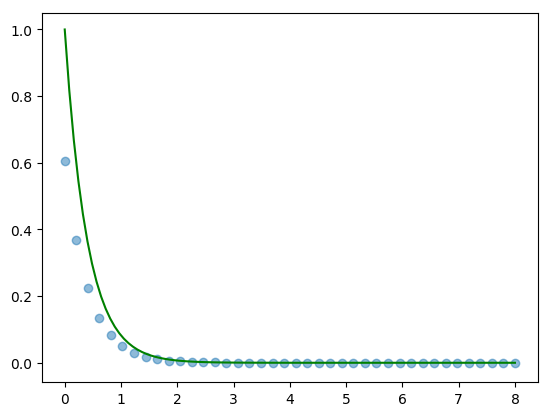

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12b02fed0>

In [9]:
A5,A6=herramientas.metodo_RK4((x,t)->-2.5x,1,linspace(0,8,40))
plt.scatter(A5,A6, alpha=0.5)
e1 = []
for i in linspace(0,8,100)
    push!(e1,e^(-2.5*i))
end
plt.plot(linspace(0,8,100),e1, color="green")

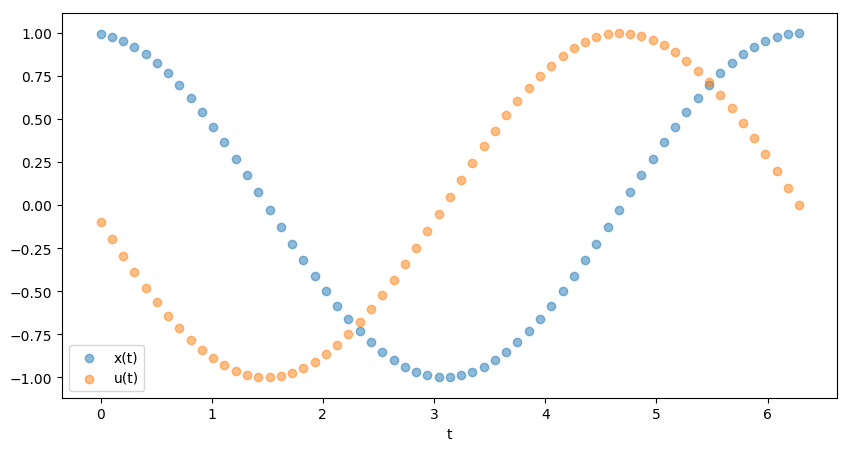

PyObject <matplotlib.legend.Legend object at 0x12b1d4b90>

In [10]:
R1,R2,R3=herramientas.metodo_RK4_2((x,u,i)-> -x,(x,u,i)-> u,[1,0],linspace(0,2pi,63))
plt.figure(figsize=(10,5))
plt.scatter(R1,R2,alpha=0.5, label="x(t)")
plt.scatter(R1,R3,alpha=0.5, label="u(t)")
plt.xlabel("t")
plt.legend()